<center><a id="top"><b><font color="red" size=5>Covid19 Detector CNN & Grid Search Tuning <br><br>IAGI CI-2</font></b></a></center><br><br>
<div class="list-group" id="list-tab" role="tablist">
<center><h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3></center>

<font color="blue" size=+1><b>1.Entry</b></font>
* [1. What's the Corona Virus ?]

<font color="blue" size=+1><b>2.Libraries</b></font>
* [1. Requirements]
* [2. Import the Necessary Libraries ]

<font color="blue" size=+1><b> 3.Mouting the Drive file and Ploting some data to verify</b></font>
* 1. Mouting Drive
* 2. Prepare Data Paths
* 3. Visualizing Data Examples
    
<font color="blue" size=+1><b> 4.Load the Dataset and Visualizing the Dataset shapes</b></font>
* 1. Importing Training Dataset
* 2. Importing Testing Dataset

<font color="blue" size=+1><b>5.GridSearch to tune all hyper parameters</b></font>
* 1. The hyper Parameters 
* 2. Fit using Grid Search

<font color="blue" size=+1><b>6.Training and Creating the Model</b></font>
* 1. Create Model & Training the model
* 2. Ploting the loss function
* 3. Ploting the accuracy

<font color="blue" size=+1><b> 7.Model Predictions </b></font> 
* 1. Testing the model on different Images to predict





<a id="1"></a>
<font color="blue" size=+2.5><b>1.1 What's the CoronaVirus ?</b></font>
<br/>
<br/>
![image.png](https://health.clevelandclinic.org/wp-content/uploads/sites/3/2020/03/caronavirusLungs-125957837-770x533-1.jpg)<br>
Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis.

**What Are the Symptoms of COVID19?**

COVID symptoms can vary from so mild you barely notice them, to so severe that hospitalization is required. How your body responds to pneumonia depends on the type germ causing the infection, your age and your overall health.Symptoms may vary in certain populations. Newborns and infants may not show any signs of the infection. Or, they may vomit, have a fever and cough, or appear restless, sick, or tired and without energy. Older adults and people who have serious illnesses or weak immune systems may have fewer and milder symptoms. They may even have a lower than normal temperature. Older adults who have COVID sometimes have sudden changes in mental awareness. For individuals that already have a chronic lung disease, those symptoms may worsen.


<font color="blue" size=+2.5><b>2. Libraries</b></font>

<font color="blue" size=+2.5><b>2.1- Requirements</b></font><br>
These are the libraries needed for the creation of this model and tuning its hyper parameters :
* Numpy
* Pandas
* Matplotlib
* Sickit-learn (GridSeachCV)
* Keras
* Tensorflow
* Skimage / OpenCV2 (image processing)

<font color="blue" size=+2.5><b>2.2 Import the Necessary Libraries</b></font><br>
Now we import the libraries already mentionned.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from sklearn.model_selection import GridSearchCV
import os
from skimage import io
from cv2 import resize
from skimage.color import rgb2gray
import warnings
warnings.filterwarnings("ignore")
print("Libraires Successfully Imported")

Libraires Successfully Imported



<font color="blue" size=+2.5><b>3. Mouting the Drive and viewing data</b></font>


<font color="blue" size=+2.5><b>3.1- Mount drive folder</b></font><br>
Let's start by mounting the drive so we can get access to the folder containing the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here is how our data is organised. <br>
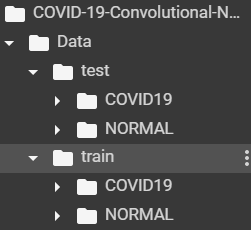
<br>Test data = Covid / Normal 
<br> Training data = Covid/Normal
<br> Now let's set up their paths.


<font color="blue" size=+2.5><b>3.2- Prepare data Paths</b></font><br>

In [ ]:
base_dir = '/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')
print(test_covid_dir)
print(test_normal_dir)
print(train_covid_dir)
print(train_normal_dir)


/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Data/test/COVID19
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Data/test/NORMAL
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Data/train/COVID19
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Data/train/NORMAL


Print out the 10 first images and number of images from each path to test it.

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

print("Train Dataset Covid Images: ",len(train_covid_names))
print("Train Dataset Normal Images: ", len(train_normal_names))
print("Test Dataset Covid Images: ", len(test_covid_names))
print("Test Dataset Normal Images: ", len(test_normal_names))
print("Total Train Images: ",len(train_covid_names + train_normal_names))
print("Total Test Images: ", len(test_covid_names + test_normal_names))

['COVID19(188).jpg', 'COVID19(257).jpg', 'COVID19(181).jpg', 'COVID19(240).jpg', 'COVID19(185).jpg', 'COVID19(281).jpg', 'COVID19(351).jpg', 'COVID19(508).jpg', 'COVID19(387).jpg', 'COVID19(248).jpg']
['NORMAL(544).jpg', 'NORMAL(1192).jpg', 'NORMAL(1208).jpg', 'NORMAL(602).jpg', 'NORMAL(1425).jpg', 'NORMAL(842).jpg', 'NORMAL(256).jpg', 'NORMAL(387).jpg', 'NORMAL(1021).jpg', 'NORMAL(878).jpg']
['COVID-19 (830).jpg', 'COVID-19 (547).jpg', 'COVID19(423).jpg', 'COVID-19 (691).jpg', 'COVID-19 (789).jpg', 'COVID19(332).jpg', 'COVID19(129).jpg', 'COVID19(315).jpg', 'COVID19(472).jpg', 'COVID-19 (878).jpg']
['NORMAL(704).jpg', 'NORMAL(1052).jpg', 'NORMAL(618).jpg', 'NORMAL(929).jpg', 'NORMAL(1190).jpg', 'NORMAL(868).jpg', 'NORMAL(372).jpg', 'NORMAL(1174).jpg', 'NORMAL(1233).jpg', 'NORMAL(161).jpg']
Train Dataset Covid Images:  545
Train Dataset Normal Images:  1266
Test Dataset Covid Images:  167
Test Dataset Normal Images:  317
Total Train Images:  1811
Total Test Images:  484



<font color="blue" size=+2.5><b>3.3- Visualisation of images</b></font><br>

Plot a grid of 16 iamges(8 Images of Covid19 and 8 images of Normal)

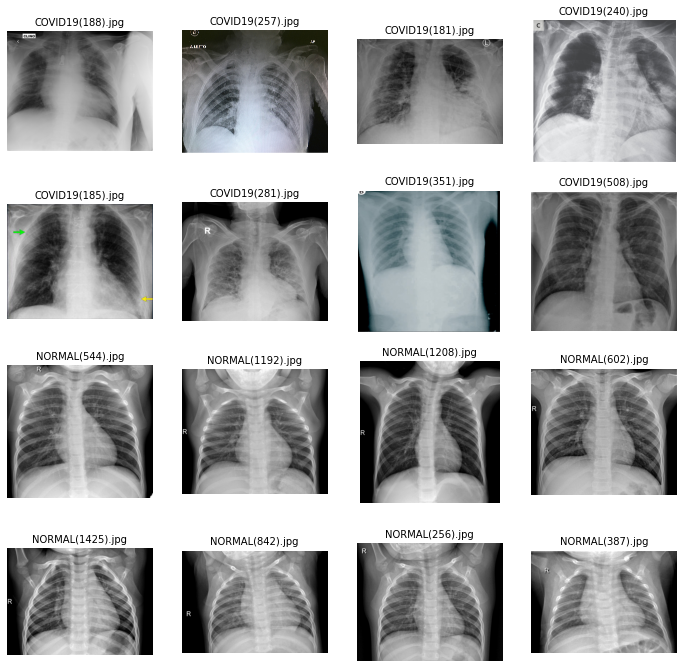

In [ ]:
 #Set the number of columns and rows
nrows=4
ncols =4

#Set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#Get the filenames from the covid and Normal dir of train dataset
next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]



for i, img_path in enumerate(next_covid_pic + next_normal_pic):
  data = img_path.split('/', 8)[8]
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()


<font color="blue" size=+2.5><b>4- Loading the Dataset</b></font><br>

<font color="blue" size=+2.5><b>4.1- Import Training Dataset</b></font><br>

In [ ]:
CATEGORIES = ["COVID19", "NORMAL"]
X, Y = [],[]
X_train,Y_train = [],[]
for category in CATEGORIES:  # do covid or normal
    path = os.path.join(train_dir,category)  # create path to covid and normal
    if category == "COVID19":
        print("Loading COVID19 Training Images! Please StandBy!")
        for img in os.listdir(path):# iterate over each image per covid and normal
            covid = rgb2gray(resize(io.imread(os.path.join(path,img)),(150,150)))
            #X_train will contain all images used for training in numpy array of pixels
            if len(covid.shape) == 3:
              print(covid.shape)
            X.append(covid)
            X_train.append(covid)
            # and Y_Train will only have 1 as value for covid infection
            Y.append(1)
            Y_train.append(1)
    if category == "NORMAL":
        print("Loading NORMAL Training Images! Please StandBy!")
        for img in os.listdir(path): #iterate over each image per covid and normal
            normal = resize(io.imread(os.path.join(path,img)),(150,150))
            #X_train will contain all images used for training in numpy array of pixels
            X.append(normal)
            X_train.append(normal)
            # and Y_Train will only have 0 as value for having normal chest X-ray
            Y.append(0)
            Y_train.append(0)
print("TRAINING LOADING DONE")  

Loading COVID19 Training Images! Please StandBy!
Loading NORMAL Training Images! Please StandBy!
TRAINING LOADING DONE


<font color="blue" size=+2.5><b>4.2- Import Testing Dataset</b></font><br>

In [ ]:
CATEGORIES = ["COVID19", "NORMAL"]
X_test,Y_test = [],[]
for category in CATEGORIES:  # do covid or normal
    path = os.path.join(test_dir,category)  # create path to covid or normal
    if category == "COVID19":
        print("Loading COVID19 Testing Images! Please StandBy!")
        for img in os.listdir(path):# iterate over each image per covid or normal
            covid = rgb2gray(resize(io.imread(os.path.join(path,img)),(150,150)))
            #X_train will contain all images used for training in numpy array of pixels
            X.append(covid)
            X_test.append(covid)
            # and Y_Train will only have 1 as value for being infected with covid
            Y.append(1)
            Y_test.append(1)
    if category == "NORMAL":
        print("Loading NORMAL Testing Images! Please StandBy!")
        for img in os.listdir(path):# iterate over each image per covid or normal
            normal = rgb2gray(resize(io.imread(os.path.join(path,img)),(150,150)))
            #X_train will contain all images used for training in numpy array of pixels
            X.append(normal)
            X_test.append(normal)
            # and Y_Train will only have 0 as value for normal case
            Y.append(0)
            Y_test.append(0)
print("TESTING LOADING DONE") 

Loading COVID19 Testing Images! Please StandBy!
Loading NORMAL Testing Images! Please StandBy!
TESTING LOADING DONE


Now that our data is loaded, let's confirm it by printing the shape of the variables and confirm it with the result we got earlier <br>
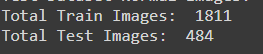


In [ ]:
X_train , Y_train = np.asarray(X_train),np.asarray(Y_train)
print("TRAINING DATA SET SHAPES")
print('x_train shape : ',X_train.shape,' \n y_train.shape: ',Y_train.shape)
print("TESTING DATA SET SHAPES")
X_test , Y_test = np.asarray(X_test),np.asarray(Y_test)
print('x_test shape : ',X_test.shape,' \n y_test.shape: ',Y_test.shape)
print("WHOLE DATASET SHAPES")
X , Y = np.asarray(X),np.asarray(Y)
print('X shape: ',X.shape,' \n Y shape: ',Y.shape)

TRAINING DATA SET SHAPES
x_train shape :  (1811, 150, 150)  
 y_train.shape:  (1811,)
TESTING DATA SET SHAPES
x_test shape :  (484, 150, 150)  
 y_test.shape:  (484,)
WHOLE DATASET SHAPES
X shape:  (2295, 150, 150)  
 Y shape:  (2295,)



<font color="blue" size=+2.5><b>5- Grid Search and tunning hyper parameters</b></font><br>


<font color="blue" size=+2.5><b>5.1- Hyper parameters</b></font><br>

In [ ]:

# define the grid search parameters
neurons = [10, 15, 20]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [20,30,  50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(neurons=neurons,batch_size=batch_size,epochs=epochs,optimizer=optimizer, activation=activation)



<font color="blue" size=+2.5><b>5.2- Fit & Tune the parameters</b></font><br>

We didn't use Conv2D and MaxPooling methods because our data shapes is a just tuple of (x,y) and doesn't have another dimension thus isn't supported by the Conv2D method while creating the model!

In [ ]:
def create_model1(neurons=1,optimizer='adam',activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_shape=(150,150), activation=activation,kernel_initializer='uniform')); model.add(Flatten());
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']); model.summary()
	return model

# create model
model = KerasClassifier(build_fn=create_model1, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

The gridSearch function fit all possible combinations 3 times (CV=3). This operation takes a lot of time to execute and unfortunately GoogleCollab timeout is set out on 12 hours, and it randomly disconnects after 30 min of inactivity so it was impossible for us to execute the gridSearch on Collab, so we created A Virtual Machine on The Azure Cloud Portal which is a pretty strong machine with 4 CPUS and a strong GPU'S and executed the code on Spyder IDE on that VM. And this was the result we obtained : 
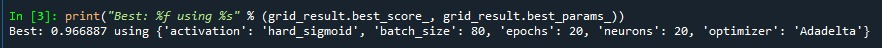

Let's create our model using these hyper parameters


<font color="blue" size=+2.5><b>6- Creating & Training the Model</b></font><br>


<font color="blue" size=+2.5><b>6.1- Creating the best model & Training it </b></font><br>

In [ ]:
modelFinal=Sequential()
modelFinal.add(Dense(20, input_shape=(150,150), kernel_initializer='uniform', activation='hard_sigmoid'))
# Flatten the image to 1 dimensional array
modelFinal.add(Flatten())
modelFinal.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
modelFinal.compile(optimizer="Adadelta", loss='binary_crossentropy', metrics=['accuracy'])
modelFinal.summary()

history=modelFinal.fit(X_train,Y_train,epochs=20, batch_size=80, verbose=1,validation_data=(X_test,Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150, 20)           3020      
_________________________________________________________________
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3001      
Total params: 6,021
Trainable params: 6,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 1s 34ms/step - loss: 0.7688 - accuracy: 0.3192 - val_loss: 0.7400 - val_accuracy: 0.3595
Epoch 2/20
23/23 [==============================] - 0s 16ms/step - loss: 0.7517 - accuracy: 0.3291 - val_loss: 0.7254 - val_accuracy: 0.3719
Epoch 3/20
23/23 [==============================] - 0s 16ms/step - loss: 0.7352 - accuracy: 0.3446 - v

Even after taking the best combinaison, we still get a pretty bad accuracy and validation accucary! To fix this problem also, let's fix some parameters and do a grid Search on the optimizer since he plays the biggest role in optimizing a model.

In [ ]:
def create_model2(optimizer="adamax"):
	# create model
	model = Sequential()
	model.add(Dense(20, input_shape=(150,150), activation="hard_sigmoid" ,kernel_initializer='uniform')); model.add(Flatten());
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']);
	return model


# create model
model = KerasClassifier(build_fn=create_model2, verbose=0,epochs=20,batch_size=80)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
print("Fitting Started")
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting Started
Best: 0.688184 using {'optimizer': 'Adamax'}
0.685428 (0.415797) with: {'optimizer': 'SGD'}
0.661678 (0.399033) with: {'optimizer': 'RMSprop'}
0.687629 (0.417156) with: {'optimizer': 'Adagrad'}
0.682097 (0.413404) with: {'optimizer': 'Adam'}
0.688184 (0.417583) with: {'optimizer': 'Adamax'}
0.676029 (0.408953) with: {'optimizer': 'Nadam'}


Best result as mentionned is the Adamax optimizer so let's run our model now using the adamax optimizer to be sure.

In [ ]:
modelFinal=Sequential()
modelFinal.add(Dense(20, input_shape=(150,150), kernel_initializer='uniform', activation='hard_sigmoid'))
# Flatten the image to 1 dimensional array
modelFinal.add(Flatten())
modelFinal.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
modelFinal.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
modelFinal.summary()

history=modelFinal.fit(X_train,Y_train,epochs=20, batch_size=80, verbose=1,validation_data=(X_test,Y_test))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 150, 20)           3020      
_________________________________________________________________
flatten_22 (Flatten)         (None, 3000)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 3001      
Total params: 6,021
Trainable params: 6,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 1s 24ms/step - loss: 0.2874 - accuracy: 0.8879 - val_loss: 0.1834 - val_accuracy: 0.9380
Epoch 2/20
23/23 [==============================] - 0s 16ms/step - loss: 0.1276 - accuracy: 0.9580 - val_loss: 0.1282 - val_accuracy: 0.9463
Epoch 3/20
23/23 [==============================] - 0s 16ms/step - loss: 0.1053 - accuracy: 0.9630 

As we can see our model has an accuracy of 98% and loss of 4% in training dataset and an accuracy of 96% and a loss 7% in the Testing dataset!  This is what makes our model an accurate one.


<font color="blue" size=+2.5><b>6.2- Plot the loss </b></font><br>

Bellow is a plot of the variation and comparison of the training/test loss values to make sure we don't have any overfitting or underfitting.

Text(0.5, 0, 'epoch')

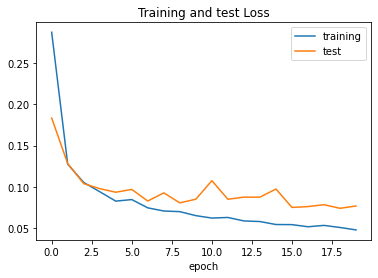

In [ ]:
#print(model.evaluate(X_train, Y_train))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'test'])
plt.title('Training and test Loss')
plt.xlabel('epoch')


<font color="blue" size=+2.5><b>6.3 Plot the accuracy</b></font><br>
Bellow is the plot of the variation of the accuracy of the testing/training dataset to confirm the accuracy of our model.

Text(0.5, 0, 'epoch')

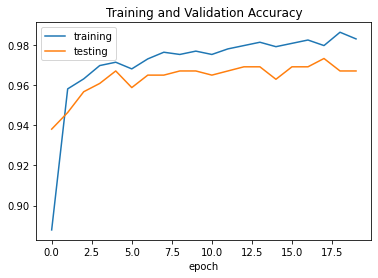

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'testing'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

And now we print the final evaluation of our model using the Keras evaluate Method

In [ ]:
test_loss, test_acc = modelFinal.evaluate(X_test,Y_test)
print('test acc:() test loss:()'.format(test_acc, test_loss))

16/16 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9669
test acc:() test loss:()



<font color="blue" size=+2.5><b>7- Predicting using different images from external datasets!</b></font><br>
Here we took X-Ray images of normal & Covid infected from external datasets that our model never seen or test or train on it. This to mesure the accuracy of our model and how well will it predict. <br><b><u>Don't forget that our model has only one output ! It's either 1 ( covid ) or 0 ( normal ) </u></b>

Extract the path

In [ ]:
basePath = '/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images'
covid1path=os.path.join(basePath,'CO1.jpeg')
covid2path=os.path.join(basePath,'CO2.jpeg')
covid3path=os.path.join(basePath,'CO3.jpeg')
covid4path=os.path.join(basePath,'CO4.jpeg')
normal1path=os.path.join(basePath,'N1.jpeg')
normal2path=os.path.join(basePath,'N2.jpeg')
normal3path=os.path.join(basePath,'N3.jpeg')
normal4path=os.path.join(basePath,'N4.jpeg')

names =['CO1','CO2','CO3','CO4','N1','N2','N3','N4']
paths=[covid1path,covid2path,covid3path,covid4path,normal1path,normal2path,normal3path,normal4path]

for i in paths:
  print(i)



/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/CO1.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/CO2.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/CO3.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/CO4.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/N1.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/N2.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/N3.jpeg
/content/drive/MyDrive/COVID-19-Convolutional-Neural-Network-Classification-master/Predicting Images/N4.jpeg


Resize Images

In [ ]:
###After extracting the paths , we rezise our images to be the same shape as our dataset!

covid1=rgb2gray(resize(io.imread(covid1path),(150,150)))
covid2=rgb2gray(resize(io.imread(covid2path),(150,150)))
covid3=rgb2gray(resize(io.imread(covid3path),(150,150)))
covid4=rgb2gray(resize(io.imread(covid4path),(150,150)))

normal1=rgb2gray(resize(io.imread(normal1path),(150,150)))
normal2=rgb2gray(resize(io.imread(normal2path),(150,150)))
normal3=rgb2gray(resize(io.imread(normal3path),(150,150)))
normal4=rgb2gray(resize(io.imread(normal4path),(150,150)))

Use the predict and method and store the result in a array !

In [ ]:
predictions = [ ]
#1- Predicting ! 
#a- COVID predictions!
covid1 = np.expand_dims(covid1, axis=0)
images = np.vstack([covid1])
classes = modelFinal.predict(images,verbose=0)
predictions.append(classes[0][0])
####
covid2 = np.expand_dims(covid2, axis=0)
images = np.vstack([covid2])
classes = modelFinal.predict(images,verbose=0)
predictions.append(classes[0][0])
###
covid3 = np.expand_dims(covid3, axis=0)
images = np.vstack([covid3])
classes = modelFinal.predict(images,verbose=0)
predictions.append(classes[0][0])
###
covid4 = np.expand_dims(covid4, axis=0)
images = np.vstack([covid4])
classes = modelFinal.predict(images,verbose=0)
predictions.append(classes[0][0])
###
#b- Normal predictions!
normal1 = np.expand_dims(normal1, axis=0)
images = np.vstack([normal1])
classes = modelFinal.predict(images)
predictions.append(classes[0][0])
####
normal2 = np.expand_dims(normal2, axis=0)
images = np.vstack([normal2])
classes = modelFinal.predict(images)
predictions.append(classes[0][0])
###
normal3 = np.expand_dims(normal3, axis=0)
images = np.vstack([normal3])
classes = modelFinal.predict(images)
predictions.append(classes[0][0])
###
normal4 = np.expand_dims(normal4, axis=0)
images = np.vstack([normal4])
classes = modelFinal.predict(images)
predictions.append(classes[0][0])

##Predictions are stored in the predictions list in this order ( COVID1-2-3-4/NORMAL1-2-3-4)
for i in range(len(predictions)):
  print(predictions[i])

0.9986942
0.9988935
0.9984797
0.9984902
0.0013547242
0.1170381
0.010495245
0.017906189


Plot each image with the result of the prediction and Value ( Close to 0 or 1)

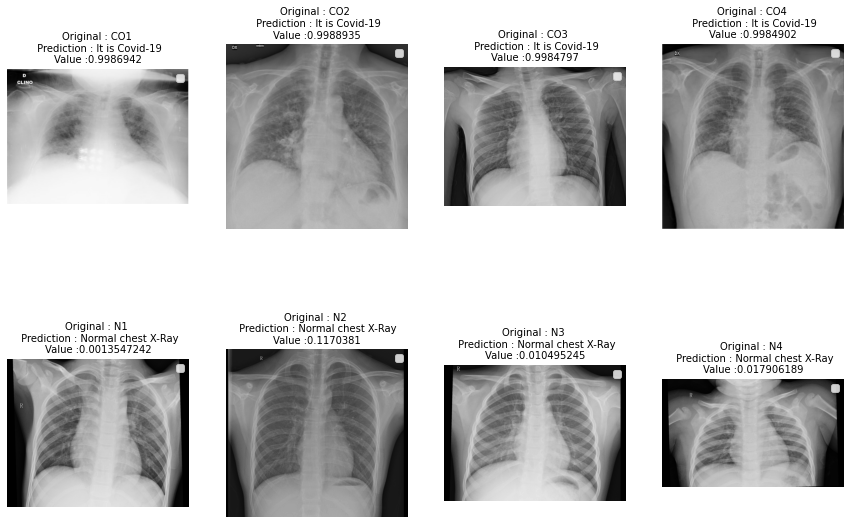

In [ ]:
#2- Let's plot the result!

#Set the number of columns and rows
nrows= 2
ncols =4
#Set the figure size
fig = plt.gcf()
fig.set_size_inches(15,10)
res = ""
for i in range(0,len(predictions)):
  if round(predictions[i]) == 1:
    res='It is Covid-19'
  else:
    res='Normal chest X-Ray'
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off')
  title = 'Original : '+names[i]+' \n Prediction : '+res+'\nValue :'+str(predictions[i])
  sp.set_title(title, fontsize=10)
  img = mpimg.imread(paths[i])
  plt.legend(['CO=COVID', 'N=NORMAL'])
  plt.imshow(img,cmap='gray')

plt.show()